In [2]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_COLOR_DESAT = '#D98C90'
CR_COLOR_DESAT = '#A0A0A0'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 1#Aug 12th, 2023

stdfont = 14
stdyfrac = 0.06

In [3]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19','AE_267']))

In [4]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

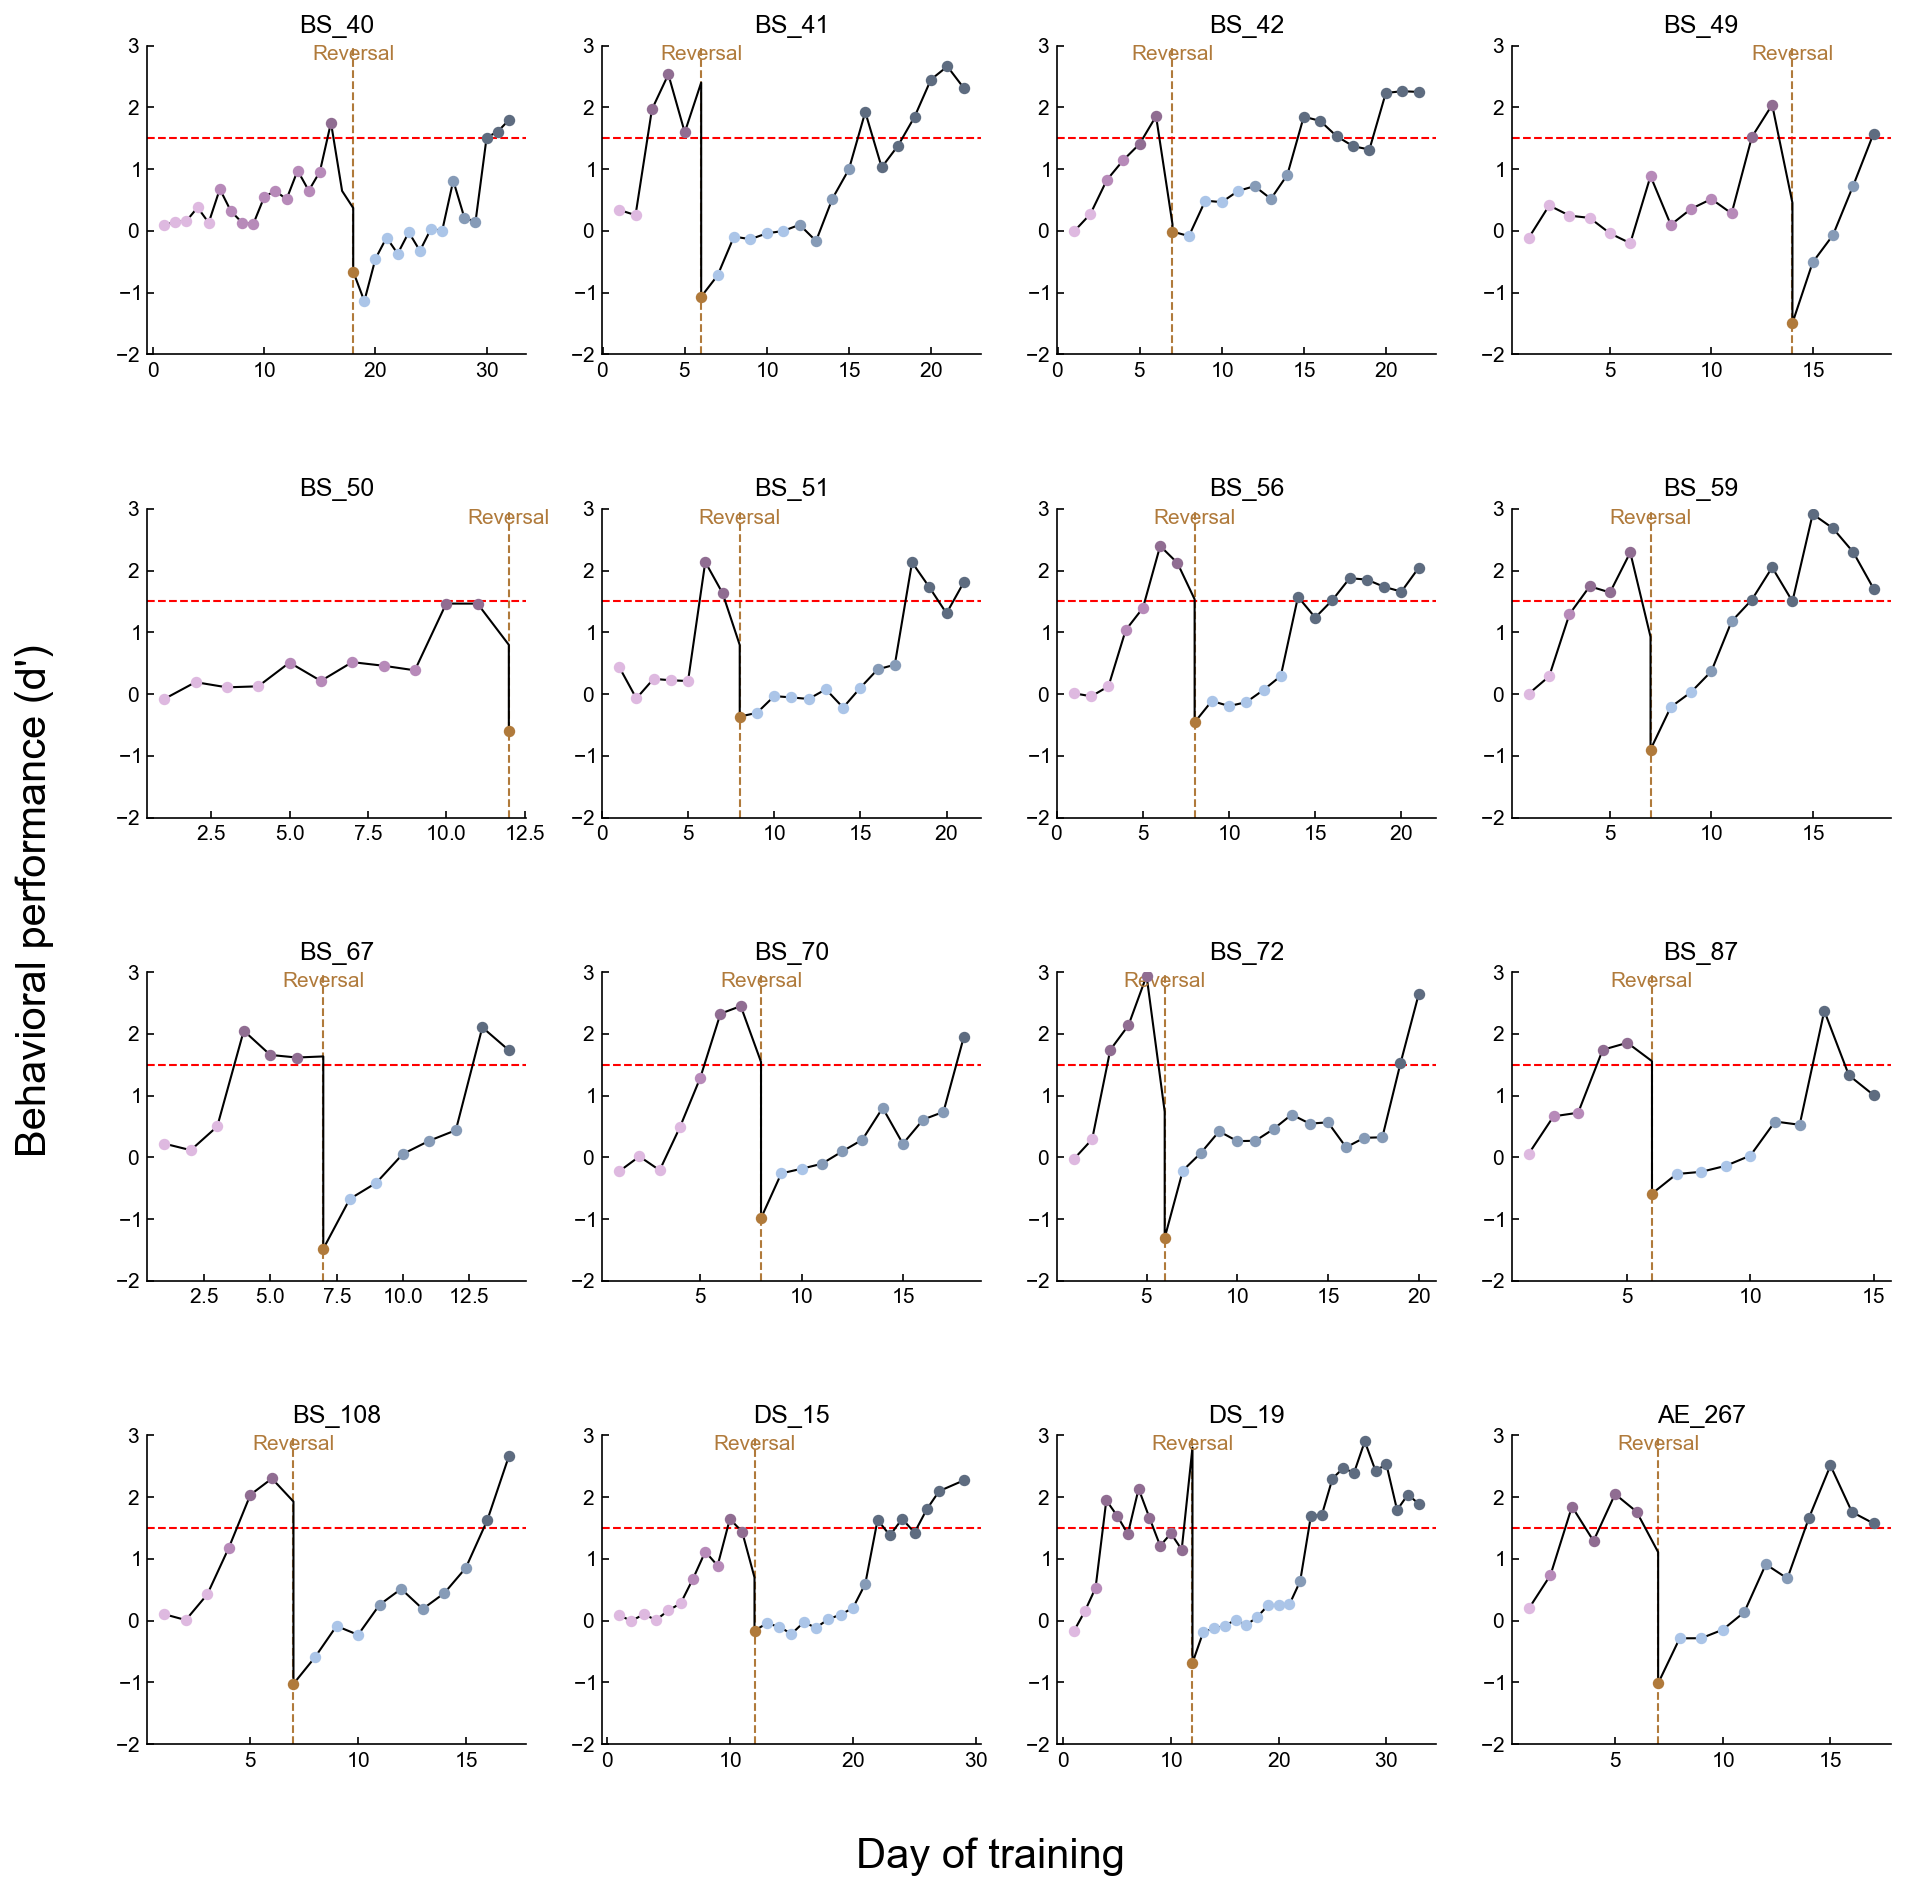

In [5]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
#plt.savefig(os.path.join('D:\\\\TempFigures','All ephys animals learning phases.pdf'),transparent=False,facecolor="white")

In [6]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 723/723 [00:07<00:00, 92.52it/s] 


In [7]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1830/1830 [00:27<00:00, 65.60it/s] 

errors for: []


In [143]:
sessionfile = ilep.getRandomSession(act_directory)
clust = sessionfile.clusters.good[0]
print(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)

1.74496644295302


In [174]:
def get_heatmap(sessionfile,clust):
    Xbins = 60

    allConds = ilep.getAllConditions(sessionfile,clust)
    trials = allConds['all_trials'].trials
    if len(trials) > 100:
        trials = trials[0:100]
    
    FRs = np.full((len(trials),Xbins),np.nan)
    binPoints = np.linspace(-0.5,1.5,Xbins+1)
    Xzero = np.min(np.where(np.greater_equal(binPoints,0)))
    Xp5 = np.min(np.where(np.greater_equal(binPoints,0.5)))
    X1 = np.min(np.where(np.greater_equal(binPoints,1)))
    X1p5 = np.min(np.where(np.greater_equal(binPoints,1.5)))
#     X2 = np.min(np.where(np.greater_equal(binPoints,2)))
#     X2p5 = np.min(np.where(np.greater_equal(binPoints,2.5)))
    for trialidx,trial in enumerate(trials):    
        for binidx in range(len(binPoints)-1):
            windowstart = sessionfile.trials.starts[trial] + sessionfile.meta.fs * binPoints[binidx]
            windowend = sessionfile.trials.starts[trial] + sessionfile.meta.fs * binPoints[binidx+1]

            SpikeTimes = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=windowstart,endtime=windowend)
            SpikeCount = len(SpikeTimes)
            FR = SpikeCount / (binPoints[binidx+1]-binPoints[binidx])

            FRs[trialidx,binidx] = FR
            
    return FRs,Xzero,Xp5,X1,X1p5#X2,X2p5

7it [00:15,  2.11s/it]<ipython-input-176-668947adb400>:24: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  img = ax.imshow(FRs,cmap='jet',aspect='auto',vmin=0,vmax=80)
871it [53:32,  3.17s/it]

session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved ac

871it [53:35,  3.69s/it]


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\\\TempFigures\\Heatmaps\\pngs\\AC\\Middle\\nan\\BS_56_7_AC_10-29-2021 cluster 4 heatmap V1.png'

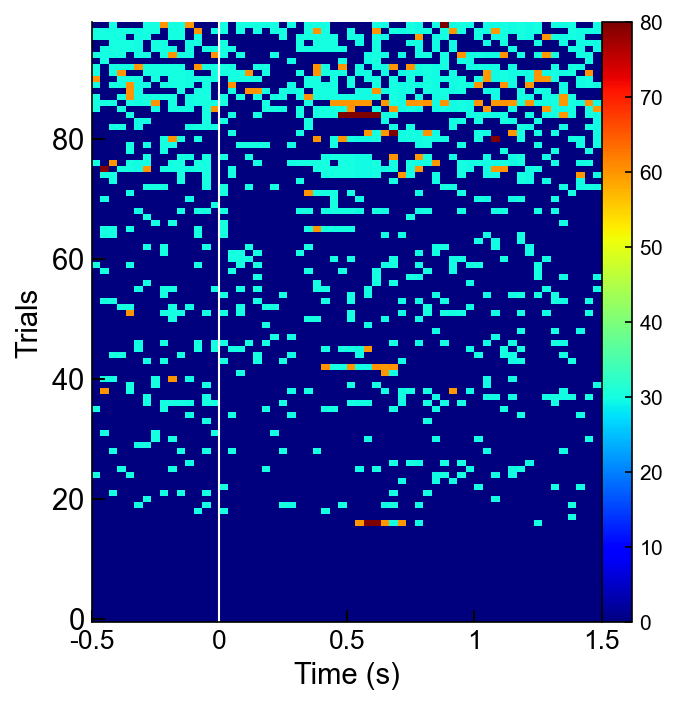

In [176]:
for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    plt.close('all')
    sessionfile = ilep.loadSessionCached(act_directory,session)

    def add_axis_size(fig, ax_w, ax_h, left, bottom):
        fig_w, fig_h = fig.get_size_inches()
        ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
        return ax

    def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
        fig_w = (ax_w + left + right) * 1.05
        fig_h = (ax_h + bottom + top) * 1.05
        fig = plt.figure(figsize=(fig_w, fig_h))
        ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
        return fig, ax

    fig,ax = make_axis_size(4, 4, left=.3, bottom=.3, right=0, top=0)
    switch_offset = 0.25

    ################################################################################################################

    FRs,Xzero,Xp5,X1,X1p5 = get_heatmap(sessionfile,clust)#,X2,X2p5
    
    img = ax.imshow(FRs,cmap='jet',aspect='auto',vmin=0,vmax=80)
    ax.set_ylim([ax.get_ylim()[1],ax.get_ylim()[0]])

    ax.axvline(Xzero-0.5,lw=1,c='white')
    
    fig.colorbar(mappable=img,pad=0)

    ################################################################################################################

    ax.set_xticks([-0.5,Xzero-0.5,Xp5-0.5,X1-0.5,X1p5-0.5])#,X2-0.5,X2p5-0.5])
    ax.set_xticklabels([-0.5,0,0.5,1,1.5])#,2,2.5])
    xlab = ax.set_xlabel('Time (s)')

    ylab = ax.set_ylabel('Trials')

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass
    
    FRmod = np.nan
    if hasattr(sessionfile.responsiveness[clust]['all_trials'],'FRmodulation'):
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    if FRmod < 1:
        label='NCR'
    elif FRmod > 5:
        label = 'CR'
    elif np.isfinite(FRmod):
        label = 'Middle'
    else:
        continue
    
    artists = [xlab,ylab]
    fig.savefig(os.path.join('D:\\\\TempFigures','Heatmaps','pngs','AC',label,EILphases[idx],ilep.generateDateString(sessionfile)+' cluster '+str(clust)+' heatmap V'+str(current_version)+'.png'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')
    fig.savefig(os.path.join('D:\\\\TempFigures','Heatmaps','pdfs','AC',label,EILphases[idx],ilep.generateDateString(sessionfile)+' cluster '+str(clust)+' heatmap V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [157]:
3/60

0.05